# Detect worms by shift in greyness

In [195]:
import os
import cv2
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [196]:
def calculate_mean_gray(image_path):
    # Load the image in grayscale mode
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Calculate and return the mean gray value
    return np.mean(img)

# Specify the directory where the images are located
folder = "2024-06"
image_dir = f"data/{folder}"

# Get a list of all image files in the directory and its subdirectories
image_files = glob.glob(os.path.join(image_dir, '**/*.jpg'), recursive=True) + glob.glob(os.path.join(image_dir, '**/*.png'), recursive=True)

# Sort the image files
image_files = sorted(image_files)

# Print the list of image files
print(image_files)

['data/2024-06/2024-06-04-00/2024-06-04-00-00.jpg', 'data/2024-06/2024-06-04-00/2024-06-04-00-01.jpg', 'data/2024-06/2024-06-04-00/2024-06-04-00-02.jpg', 'data/2024-06/2024-06-04-00/2024-06-04-00-03.jpg', 'data/2024-06/2024-06-04-00/2024-06-04-00-04.jpg', 'data/2024-06/2024-06-04-00/2024-06-04-00-05.jpg', 'data/2024-06/2024-06-04-00/2024-06-04-00-06.jpg', 'data/2024-06/2024-06-04-00/2024-06-04-00-07.jpg', 'data/2024-06/2024-06-04-00/2024-06-04-00-08.jpg', 'data/2024-06/2024-06-04-00/2024-06-04-00-09.jpg', 'data/2024-06/2024-06-04-00/2024-06-04-00-10.jpg', 'data/2024-06/2024-06-04-00/2024-06-04-00-11.jpg', 'data/2024-06/2024-06-04-00/2024-06-04-00-12.jpg', 'data/2024-06/2024-06-04-00/2024-06-04-00-13.jpg', 'data/2024-06/2024-06-04-00/2024-06-04-00-14.jpg', 'data/2024-06/2024-06-04-00/2024-06-04-00-15.jpg', 'data/2024-06/2024-06-04-00/2024-06-04-00-16.jpg', 'data/2024-06/2024-06-04-00/2024-06-04-00-17.jpg', 'data/2024-06/2024-06-04-00/2024-06-04-00-18.jpg', 'data/2024-06/2024-06-04-00/20

In [197]:
mean_gray_values = [calculate_mean_gray(image_file) for image_file in image_files]
names = [os.path.basename(f) for f in image_files]
dates = [datetime.strptime(os.path.basename(f).split('.')[0], '%Y-%m-%d-%H-%M').isoformat() for f in image_files]

df = pd.DataFrame({
    'name': names,
    'date': dates,
    'mean_gray_value': mean_gray_values
})

In [198]:
df

,name,date,mean_gray_value
0,2024-06-04-00-00.jpg,2024-06-04T00:00:00,38.205447
1,2024-06-04-00-01.jpg,2024-06-04T00:01:00,38.220699
2,2024-06-04-00-02.jpg,2024-06-04T00:02:00,38.241191
3,2024-06-04-00-03.jpg,2024-06-04T00:03:00,38.230134
4,2024-06-04-00-04.jpg,2024-06-04T00:04:00,38.216246
...,...,...,...
1172,2024-06-04-20-55.jpg,2024-06-04T20:55:00,35.696507
1173,2024-06-04-20-56.jpg,2024-06-04T20:56:00,35.640143
1174,2024-06-04-20-57.jpg,2024-06-04T20:57:00,35.645423
1175,2024-06-04-20-58.jpg,2024-06-04T20:58:00,35.856866


In [199]:
# Filter out outliers caused by shifts in light conditions
Q1 = df['mean_gray_value'].quantile(0.25)
Q3 = df['mean_gray_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.2 * IQR
upper_bound = Q3 + 0.2 * IQR

df_no_outliers = df[(df['mean_gray_value'] >= lower_bound) & (df['mean_gray_value'] <= upper_bound)]
df_no_outliers

,name,date,mean_gray_value
123,2024-06-04-02-06.jpg,2024-06-04T02:06:00,37.549998
137,2024-06-04-02-20.jpg,2024-06-04T02:20:00,37.592155
145,2024-06-04-02-28.jpg,2024-06-04T02:28:00,37.567867
152,2024-06-04-02-35.jpg,2024-06-04T02:35:00,37.568625
196,2024-06-04-03-20.jpg,2024-06-04T03:20:00,37.549254
...,...,...,...
930,2024-06-04-16-48.jpg,2024-06-04T16:48:00,36.554475
931,2024-06-04-16-49.jpg,2024-06-04T16:49:00,36.558609
933,2024-06-04-16-51.jpg,2024-06-04T16:51:00,36.551133
934,2024-06-04-16-52.jpg,2024-06-04T16:52:00,36.549489


## Plot the gray values over time

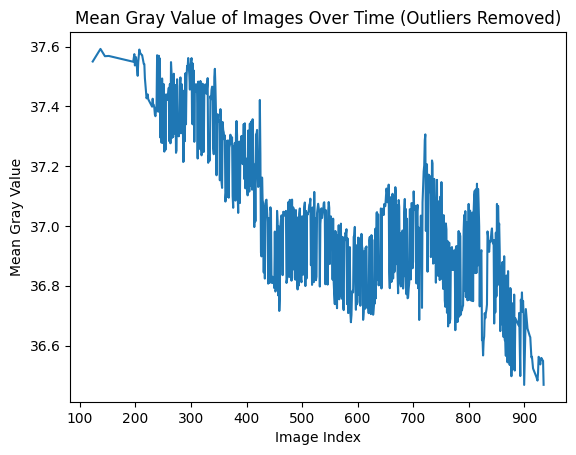

In [200]:
# Plot the filtered gray values
plt.plot(df_no_outliers['mean_gray_value'])
plt.title('Mean Gray Value of Images Over Time (Outliers Removed)')
plt.xlabel('Image Index')
plt.ylabel('Mean Gray Value')
plt.show()

In [201]:
# Calculate the shift in grayness level
df_no_outliers.loc[:, 'grayness_shift'] = df_no_outliers['mean_gray_value'].diff()
df_no_outliers.loc[:, 'compared_with'] = df_no_outliers['name'].shift(1)
df_no_outliers = df_no_outliers.dropna(subset=['grayness_shift'])

# Sort the DataFrame by the shift in grayness level
# df_sorted = df_no_outliers.sort_values(by='grayness_shift', key=lambda col: col.abs())
df_sorted = df_no_outliers.sort_values(by='grayness_shift', key=lambda col: col.abs())
df_sorted.head()

# df_sorted

/var/folders/5z/nz14w8q57gxg_6x6qh19f0qr0000gn/T/ipykernel_98793/716921509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.loc[:, 'grayness_shift'] = df_no_outliers['mean_gray_value'].diff()
/var/folders/5z/nz14w8q57gxg_6x6qh19f0qr0000gn/T/ipykernel_98793/716921509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.loc[:, 'compared_with'] = df_no_outliers['name'].shift(1)


,name,date,mean_gray_value,grayness_shift,compared_with
467,2024-06-04-08-56.jpg,2024-06-04T08:56:00,37.047376,0.000067,2024-06-04-08-55.jpg
233,2024-06-04-03-58.jpg,2024-06-04T03:58:00,37.404336,-0.000111,2024-06-04-03-57.jpg
839,2024-06-04-15-15.jpg,2024-06-04T15:15:00,36.947310,-0.000230,2024-06-04-15-14.jpg
351,2024-06-04-05-58.jpg,2024-06-04T05:58:00,37.352350,-0.000280,2024-06-04-05-57.jpg
256,2024-06-04-04-21.jpg,2024-06-04T04:21:00,37.439493,-0.000371,2024-06-04-04-20.jpg


In [202]:
df_sorted.head()

,name,date,mean_gray_value,grayness_shift,compared_with
467,2024-06-04-08-56.jpg,2024-06-04T08:56:00,37.047376,0.000067,2024-06-04-08-55.jpg
233,2024-06-04-03-58.jpg,2024-06-04T03:58:00,37.404336,-0.000111,2024-06-04-03-57.jpg
839,2024-06-04-15-15.jpg,2024-06-04T15:15:00,36.947310,-0.000230,2024-06-04-15-14.jpg
351,2024-06-04-05-58.jpg,2024-06-04T05:58:00,37.352350,-0.000280,2024-06-04-05-57.jpg
256,2024-06-04-04-21.jpg,2024-06-04T04:21:00,37.439493,-0.000371,2024-06-04-04-20.jpg


In [203]:
def display_images(row, image_dir):
    # Get the current image
    img_name = row['name']
    img_path = glob.glob(os.path.join(image_dir, f'**/{img_name}'), recursive=True)[0]
    img = mpimg.imread(img_path)

    # Get the image it was compared with
    compared_with_name = row['compared_with']
    if pd.notna(compared_with_name):  # Check if compared_with_name is not NaN
        compared_with_path = glob.glob(os.path.join(image_dir, f'**/{compared_with_name}'), recursive=True)[0]
        compared_with_img = mpimg.imread(compared_with_path)

        # Calculate and display the difference between the images
        diff_img = np.abs(img.astype(float) - compared_with_img.astype(float))  # Calculate the absolute difference
        diff_img /= np.max(diff_img)  # Normalize to [0, 1] range
        plt.imshow(diff_img, cmap='gray')  # Display the difference image in grayscale
        plt.title('Difference between {} and {}'.format(img_name, compared_with_name))

    plt.show()

In [204]:
df_sorted.head(1)

,name,date,mean_gray_value,grayness_shift,compared_with
467,2024-06-04-08-56.jpg,2024-06-04T08:56:00,37.047376,0.000067,2024-06-04-08-55.jpg


In [ ]:
# Display the image with the lowest shift in grayness level

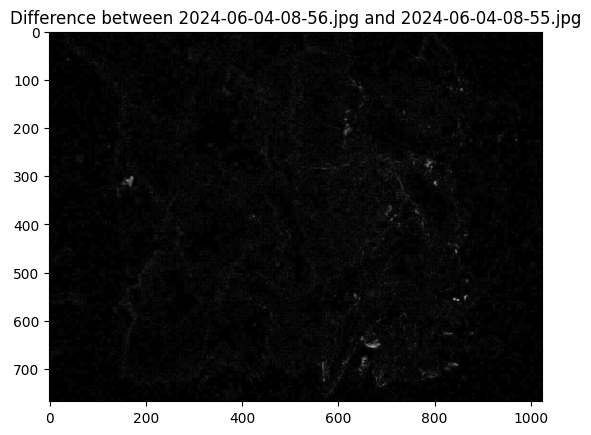

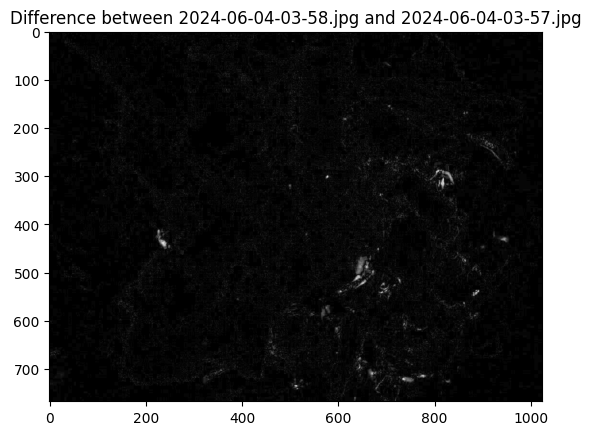

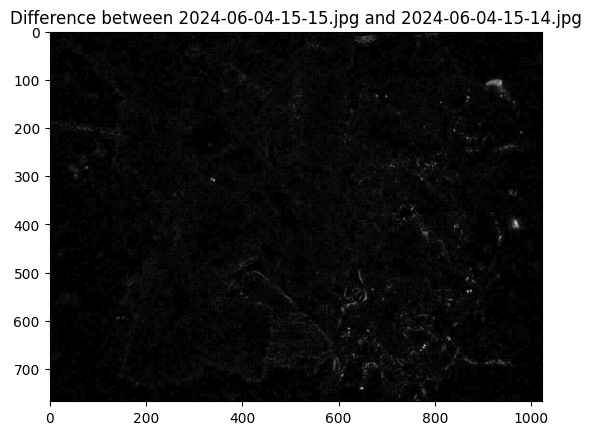

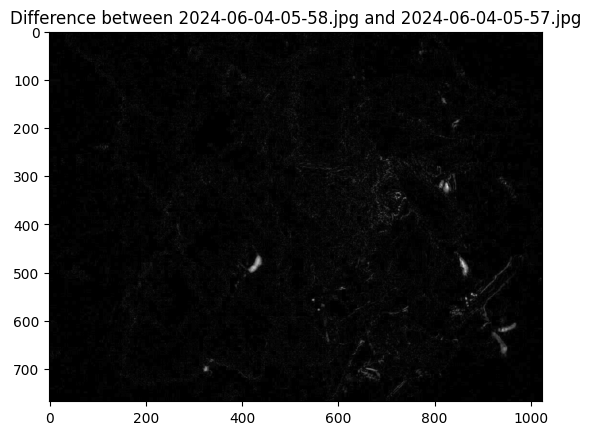

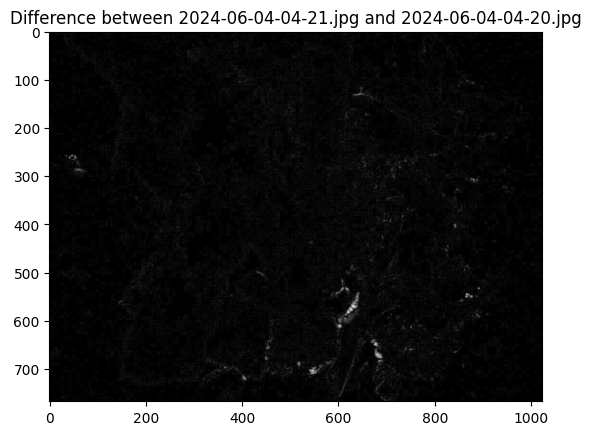

In [205]:
first_5_rows = df_sorted.head(5)

# Display the images
for _, row in first_5_rows.iterrows():
    display_images(row, image_dir)

In [209]:
# Display the image with the highest shift in grayness level

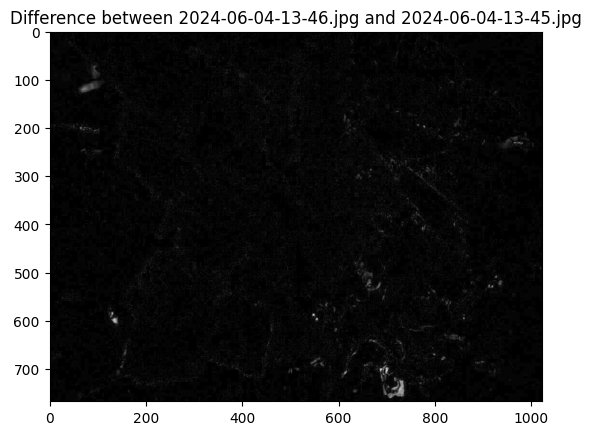

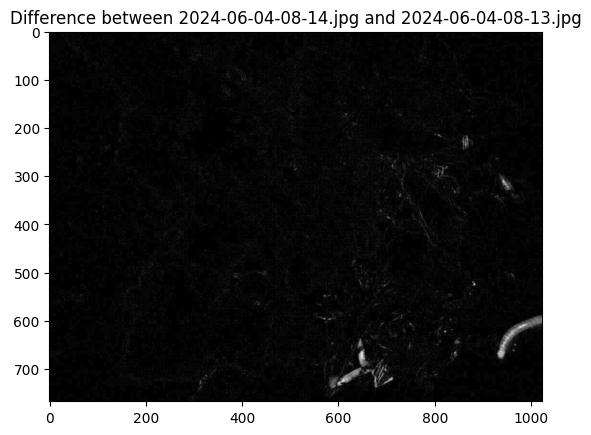

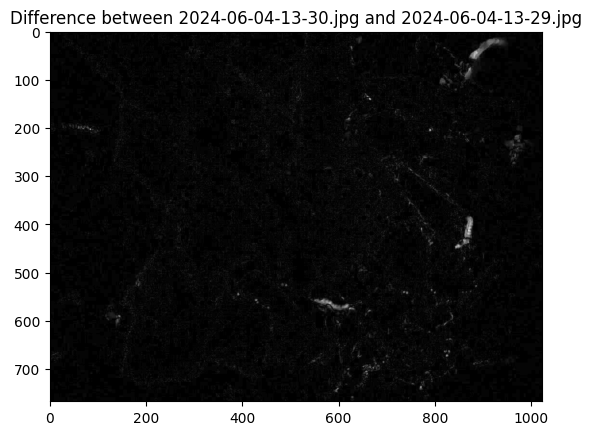

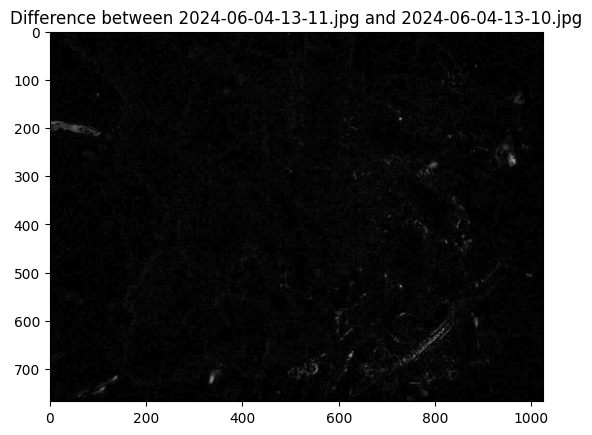

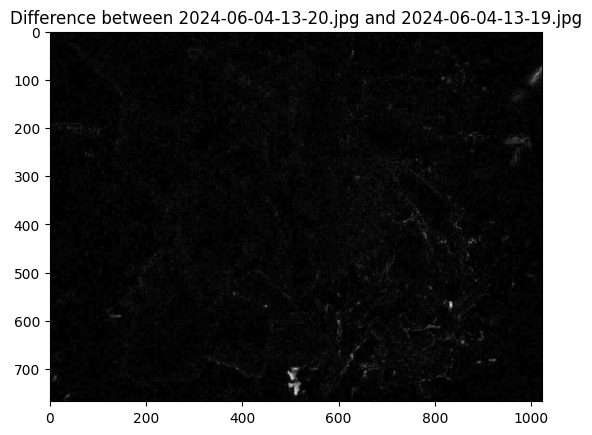

In [207]:
# Get the last 5 rows from df_sorted
last_5_rows = df_sorted.tail(5)

# Display the images
for _, row in last_5_rows.iterrows():
    display_images(row, image_dir)